In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd
import pickle

In [2]:
states_df = pd.read_csv("../../data/lookup_data/states.csv")
states_df.head()

,state_code,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [3]:
# Loading the data as a pandas dataframe
df = pd.read_csv('../../data/cleaned_data/tmaxdata.csv',names=["state_code", "date", "value"])
df = df.loc[df['state_code'] == 'TX']
df.drop(["state_code"],inplace=True,axis=1)
df

,date,value
15330,1905-01-01,28.9
15331,1905-01-02,30.6
15332,1905-01-03,31.1
15333,1905-01-04,25.6
15334,1905-01-05,27.8
...,...,...
2152700,2022-08-07,42.8
2152701,2022-08-08,41.1
2152702,2022-08-09,42.2
2152703,2022-08-10,42.8


In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df

,date,value,year,month,day
15330,1905-01-01,28.9,1905,1,1
15331,1905-01-02,30.6,1905,1,2
15332,1905-01-03,31.1,1905,1,3
15333,1905-01-04,25.6,1905,1,4
15334,1905-01-05,27.8,1905,1,5
...,...,...,...,...,...
2152700,2022-08-07,42.8,2022,8,7
2152701,2022-08-08,41.1,2022,8,8
2152702,2022-08-09,42.2,2022,8,9
2152703,2022-08-10,42.8,2022,8,10


In [5]:
#
# Create Training and Test Split
#
X_train, X_test, y_train, y_test = train_test_split(df[['year','month','day']].values, df[['value']].values.flatten(), random_state=42, test_size=0.1)


In [6]:
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [7]:
pickle.dump(sc, open('scaler.pkl','wb'))

In [8]:
X_test

array([[2000,    6,   14],
       [1934,    9,   20],
       [1910,   12,   23],
       ...,
       [1910,   11,   16],
       [1942,    3,   18],
       [1989,   11,   12]])

In [9]:
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}


In [10]:
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)



In [11]:
y_train

array([23.9, 29.4, 32.2, ..., 40. , 36.7, 35. ])

In [12]:
#
# Fit the model
#
gbr.fit(X_train_std, y_train)


/Users/sanilveeravu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=5,
                          min_samples_split=5, n_estimators=1000)

In [13]:
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))


Model Accuracy: 0.788


In [14]:
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 7.6854


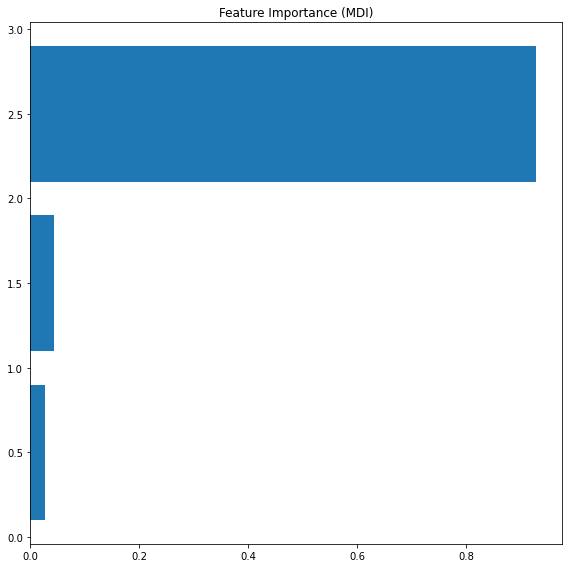

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(bhp.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [16]:
row = sc.transform(np.array([[1905,7,15]]))
yhat = gbr.predict(row)
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 39


In [17]:
pickle.dump(gbr, open("tmaxmn.dat", "wb"))

In [21]:
model = pickle.load(open("tmaxmn.dat", "rb"))

In [22]:
row = sc.transform([[1905,1,15]])
yhat = model.predict(row)
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 24


In [23]:
def makePredictions(metric, state_code, year, month, day):

        input_pred = [[year, month, day]]

        filename = f"tmaxmn.dat"
        model = pickle.load(open(filename, "rb"))
        
        sc = StandardScaler()
        sc = pickle.load(open('scaler.pkl','rb'))
        row = sc.transform(input_pred)

        prediction_result = model.predict(row)
        print('Prediction: %d' % prediction_result[0])

        return prediction_result[0]

In [25]:
x1=makePredictions("TMAX","AL",1905,1,15)
x1

Prediction: 24


24.812790903032255